![example](images/director_shot.jpeg)

# Microsoft Movie Studio

**Authors:** Mengyu Jackson
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***
Questions to consider:
* Is movie making money? Yes, more movie making money than losing money
    few chart show result by number of moive, budget, gross.
* What type movie making more money? What's the genre, duration(how long), size budget, studio, director and writer, actor. experienc, etc.
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

In the folder zippedData in the associated GitHub repository are movie datasets from:

   * Box Office Mojo
   * IMDB
   * Rotten Tomatoes
   * TheMovieDB.org

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the visualization package you created
import code.visualizations as viz
import code.data_preparation as prep

## Data Preparation

Group data from diffent resourse to 'clean_data' which have title, cost, gross, studio, year.


***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [3]:
# Single resource data: bom, tmdb, tn. 
# Cleaned
bom = pd.read_csv("data/zippedData/bom.movie_gross.csv")
clean_bom = prep.clean_bom(bom)
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv")
clean_tmdb_movies = prep.clean_tmdb_movies(tmdb_movies)
tn_movie_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv")
clean_tn_movie_budgets = prep.clean_tn_movie_budgets(tn_movie_budgets)

# read rt file
# cleaned
rt_info = pd.read_csv("data/zippedData/rt.movie_info.tsv", sep='\t')
rt_reviews = pd.read_csv("data/zippedData/rt.reviews.tsv", sep='\t', encoding='unicode_escape')
rt_something = rt_info.groupby(['genre','runtime','theater_date']).size().reset_index().rename(columns={0:'count'})
clean_rt_info = prep.clean_rt_info(rt_info)

# read imdb file
imdb_name_basics = pd.read_csv("data/zippedData/name.basics.csv")
imdb_title_basics = pd.read_csv("data/zippedData/title.basics.csv")
imdb_title_crew = pd.read_csv("data/zippedData/title.crew.csv")
imdb_title_ratings = pd.read_csv("data/zippedData/title.ratings.csv")
imdb_title_principals = pd.read_csv("data/zippedData/title.principals.csv")

In [4]:
# joinn tconst: imdb_title_basics, imdb_title_crew, imdb_title_ratings
join_imdb_tconst = prep.join_imdb(imdb_title_basics, imdb_title_crew, imdb_title_ratings)

# join nconst: imbd_name_basics, imbd_title_principals
join_imdb_nconst = imdb_name_basics.set_index('nconst').join(imdb_title_principals.set_index('nconst'), lsuffix="_basics", rsuffix="_principals", how ='inner')

# join clean_bom and clean_tn_movie_budgets
cleaned_data = prep.join_bom_tn_budgets(clean_bom, clean_tn_movie_budgets)

# join data: single rescurce complete
cleaned_data = cleaned_data.join(clean_tmdb_movies, lsuffix="_cleaned_data", rsuffix="_tmdb", how ='inner')

# Join join_imdb_tconst and cleaned_data
cleaned_data = prep.join_imdb_tconst_cleaned_data(join_imdb_tconst, cleaned_data)

# # Create new Column 'ROI', 'profit_status'
cleaned_data = prep.create_column(cleaned_data)

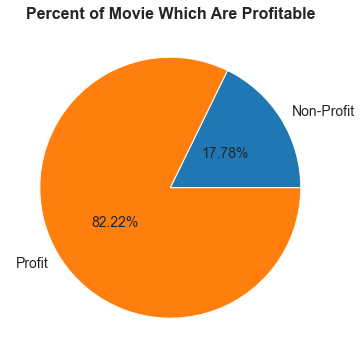

In [5]:
# Question: Is movie making money? 
# Answer: Yes, more movie making money than losing money.
# 
number_of_movie = cleaned_data.groupby("profit_status").size()
# number_of_profit_movie = cleaned_data[cleaned_data['ROI'] <= 0].size
# number_of_no_profit_movie = cleaned_data[cleaned_data['ROI'] > 0].size
pie, ax = plt.subplots(figsize=[10,6])
labels = number_of_movie.keys()
plt.pie(x=number_of_movie, autopct="%.2f%%", labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
plt.title("Percent of Movie Which Are Profitable", fontsize=16, weight = 'bold');
pie.savefig("Percent_of_Movie_Which_Are_Profitable.png")


53976262650


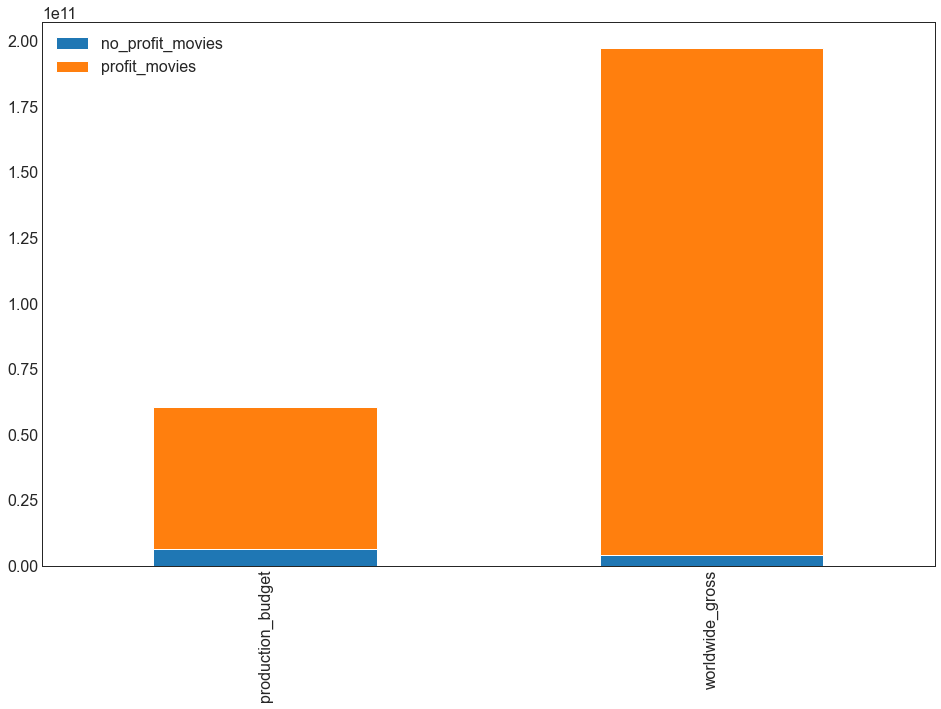

In [6]:
# Question: Is movie making money? 
# Answer: Yes, more movie making money than losing money.
# few chart show result by number of moive, budget, gross.

# budget_of_movie = cleaned_data.groupby("profit_status").sum()

budget_no_profit_movies = cleaned_data[cleaned_data['ROI'] <= 0]['production_budget'].sum()
budget_profit_movies = cleaned_data[cleaned_data['ROI'] > 0]['production_budget'].sum()
worldwide_no_profit_movies = cleaned_data[cleaned_data['ROI'] <= 0]['worldwide_gross'].sum()
worldwide_profit_movies = cleaned_data[cleaned_data['ROI'] > 0]['worldwide_gross'].sum()

# stripped_data = cleaned_data[['studio','production_budget', 'worldwide_gross']].groupby('studio').sum()

foo= pd.DataFrame([('production_budget', 'no_profit_movies',budget_no_profit_movies),
                   ('production_budget', 'profit_movies', budget_profit_movies),
                   ('production_budget', 'all_movies', budget_profit_movies + budget_no_profit_movies),
                   ('worldwide_gross', 'no_profit_movies', worldwide_no_profit_movies),
                   ('worldwide_gross', 'profit_movies', worldwide_profit_movies),
                   ('worldwide_gross', 'all_movies', worldwide_no_profit_movies + worldwide_profit_movies)],
                  columns=('type_money', 'movie_category', 'amount'))

foo2= pd.DataFrame([(budget_no_profit_movies, budget_profit_movies),
                   (worldwide_no_profit_movies, worldwide_profit_movies)],
                   index=["production_budget", "worldwide_gross"],
                  columns=('no_profit_movies', 'profit_movies'))

#stripped_data.reset_index(inplace=True)
#stripped_data
#melted_data = stripped_data.melt(id_vars="studio",var_name="type_money", value_name="money")

# cleaned_data[cleaned_data['ROI'] > 0].size
# cleaned_data.info()
#ax = sns.barplot(x="movie_category", y="amount", hue="type_money", data=foo, stacked=True)
# foo.plot.bar(stacked=True)
# df.set_index('App').T.plot(kind='bar', stacked=True)
ax = foo2.plot.bar(stacked=True)
print(budget_profit_movies)

In [7]:
# What genre makes most money?

#cleaned_data.info()
# sns.scatterplot(data=cleaned_data[cleaned_data["ROI"] < 100], x="vote_average", y="ROI")


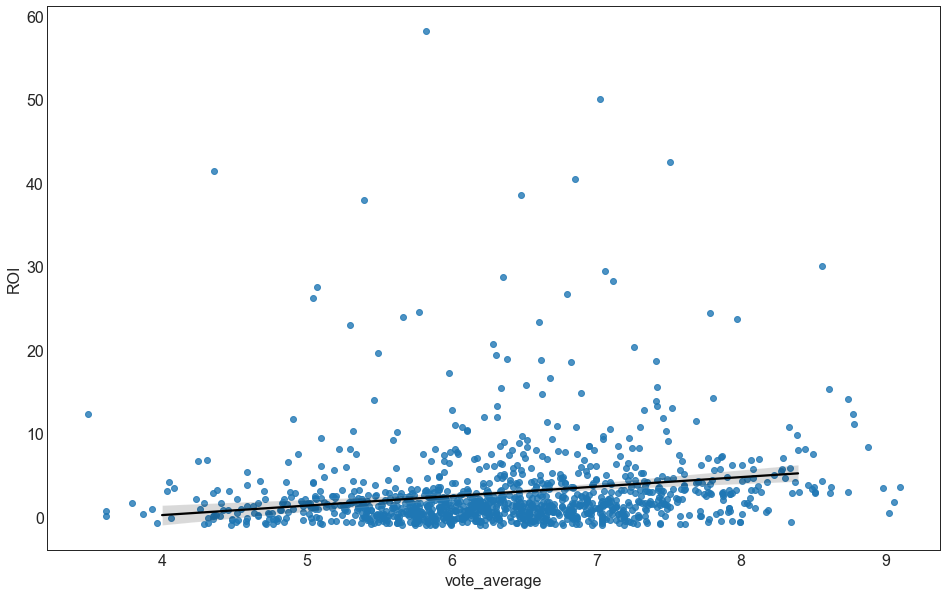

In [8]:
# Does higher vote_average mean higher ROI?
sns.regplot(data=cleaned_data[cleaned_data["ROI"] < 100],
            x="vote_average", 
            y="ROI",
            x_jitter=True,
            line_kws = {'color':'black'})

# Answer: Correlation is weak, but appears to be negative(!

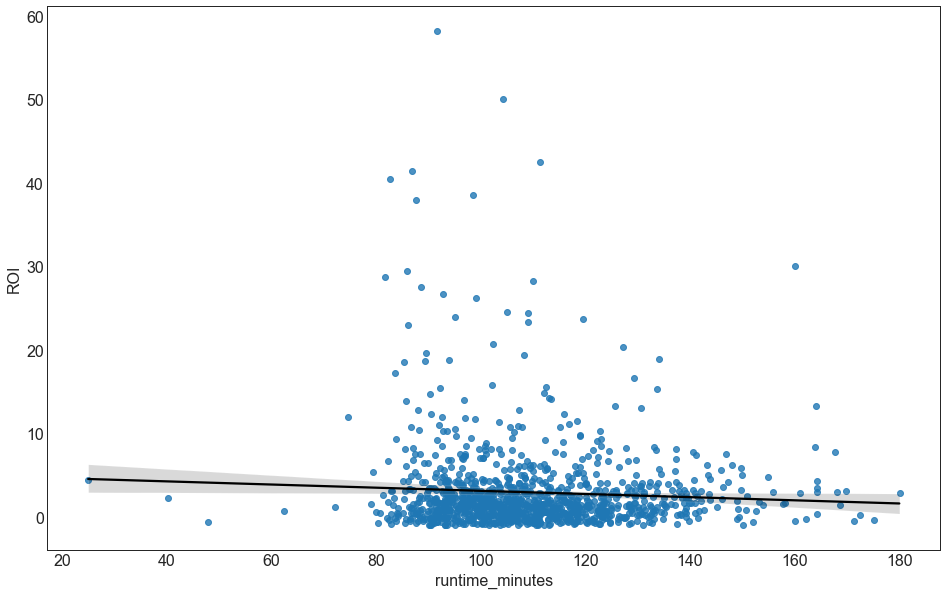

In [9]:
# Question: Does higher runtime mean higher ROI?
sns.regplot(data=cleaned_data[cleaned_data["ROI"] < 100],
            x="runtime_minutes", 
            y="ROI",
            x_jitter=True,
           line_kws = {'color':'black'})

# Answer: No, shorter movies seem to make more money.

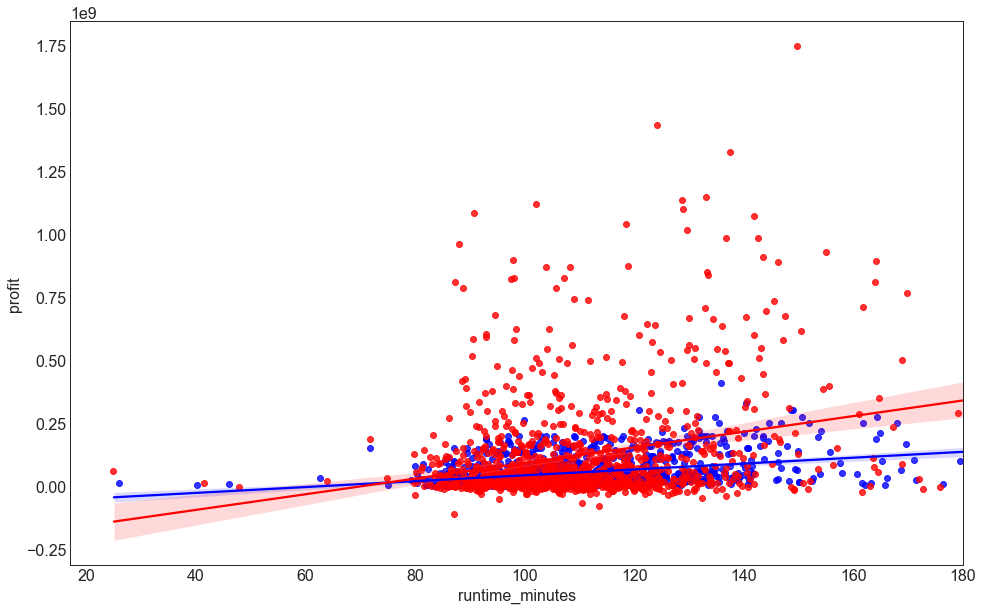

In [10]:
# Questions? Why does shorter runtime mean higher ROI?
# Hypothesis: Lower cost for shorter movies; similar profit.
sns.regplot(data=cleaned_data[cleaned_data["ROI"] < 100],
            x="runtime_minutes", 
            y="production_budget",
            x_jitter=True,
            color="blue")

sns.regplot(data=cleaned_data[cleaned_data["ROI"] < 100],
            x="runtime_minutes", 
            y="profit",
            x_jitter=True,
            color="Red")


# Result: Smaller movies do have lower cost, but also have lower profit.

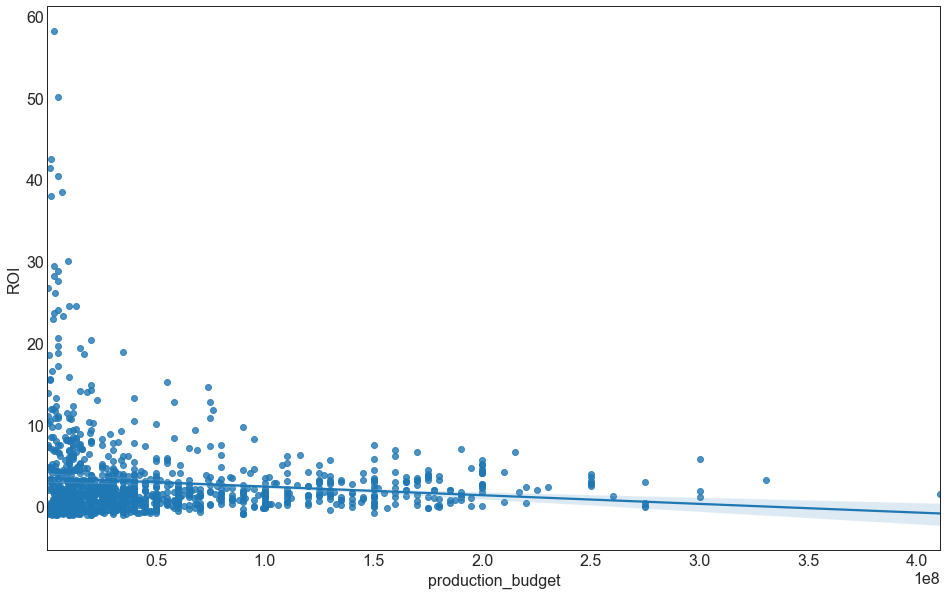

In [11]:
# Questions: Can we see a direct relationship between budget and ROI?
sns.regplot(data=cleaned_data[cleaned_data["ROI"] < 100],
#sns.regplot(data=cleaned_data,

            x="production_budget", 
            y="ROI",
            x_jitter=True)


# Result: Big budget movies tend to do worse than low budget movies, per $ invested.

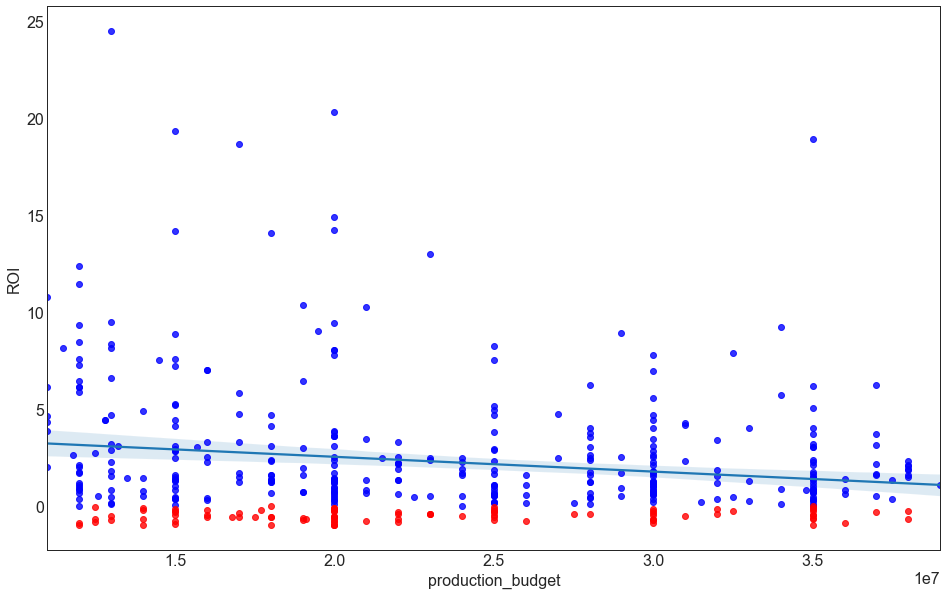

In [12]:
# Assumption: Microsoft is not interested in flooding the market with super low budget movies: Microsoft has the upfront cash to 
# acquire expensive IP which could potentially be turned into more or less guaranteed profit (like Disney), but would need decent budgets to make that money back.
# Let's ignore the cheapest 20% of movies made.
#
# Questions: Excluding the bottom 20% of movies in terms of budget, what is the relationship between budget and ROI
# in the cheapest half of the remaining movies 

# Plot regression line for all movies we're considering now
sns.regplot(data=cleaned_data[(cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.2)) & 
                              (cleaned_data["production_budget"] < cleaned_data['production_budget'].quantile(.6))],
            scatter=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True)
# Plot points that make money Blue
sns.regplot(data=cleaned_data[(cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.2)) & 
                              (cleaned_data["production_budget"] < cleaned_data['production_budget'].quantile(.6)) & 
                              (cleaned_data["profit"] > 0)],
            fit_reg=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True,
            color="blue")
# Plot points that lose money Red
sns.regplot(data=cleaned_data[(cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.2)) & 
                              (cleaned_data["production_budget"] < cleaned_data['production_budget'].quantile(.6)) & 
                              (cleaned_data["profit"] <= 0)],
            fit_reg=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True,
            color="red")

# Result: Trend line looks similar (but less severe) to original trend line; more expensive movies do worse, but not by much

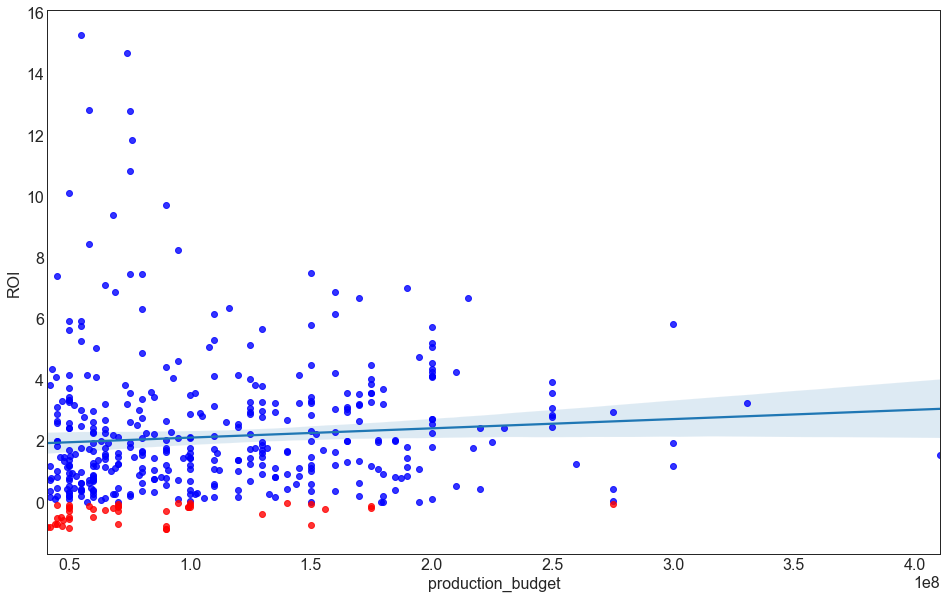

In [13]:
# Questions: Excluding the bottom 20% of movies in terms of budget, what is the relationship between budget and ROI
# in the cheapest half of the remaining movies 

# Plot regression line for all movies we are interested in
sns.regplot(data=cleaned_data[cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.6)],
            scatter=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True)
# Plot points that make money Blue
sns.regplot(data=cleaned_data[(cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.6)) & 
                              (cleaned_data["profit"] > 0)],
            fit_reg=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True,
            color="blue")
# Plot points that lose money Red
sns.regplot(data=cleaned_data[(cleaned_data["production_budget"] > cleaned_data['production_budget'].quantile(.6)) & 
                              (cleaned_data["profit"] <= 0)],
            fit_reg=False,
            x="production_budget", 
            y="ROI",
            x_jitter=True,
            color="red")


# Result: Trend line reverses! At some point, each additional dollar invested improves ROI on every dollar invested.
# This suggests we could either make a bunch of smaller movies, or else make a big movie, but movies near the 60th percentile are the worst investment.


In [14]:
# Questions: Can we flesh out the trend we just identified and make it more solid? 

# Assign data to bins based on production budget quantile
num_quantiles = 10
quantile_size = 100//num_quantiles
cleaned_data["prod_budget_bin"] = pd.qcut(cleaned_data["production_budget"], 
                                          num_quantiles, 
                                          labels=[f"{bin_num*quantile_size}-{bin_num*quantile_size+quantile_size}" for bin_num in range(num_quantiles)])

cleaned_data.head()

bin_summary = cleaned_data[["production_budget", "profit","prod_budget_bin"]].groupby("prod_budget_bin").sum()
bin_summary["ROI"] = bin_summary["profit"] / bin_summary["production_budget"]

bin_summary

# Result: Middle of the pack movies are definitely the worst, sporting a ROI of barely 1.2, 
# less than half of what we could get making a movie with a 20-30 percentile budget (ROI 2.6), or a 90-100 percentile budget(ROI 2.5)
# Again, dirt cheap movies tend to be even better, but may worsen our brand.


,production_budget,profit,ROI
prod_budget_bin,,,
0-10,378439650,3133978557,8.281317
10-20,933500000,3067913093,3.286463
20-30,1495400000,4795121917,3.206581
30-40,2335600000,5452510625,2.334522
40-50,3197000000,5363319840,1.677610
50-60,4837800000,9111841941,1.883468
60-70,4294700000,7781092318,1.811789
70-80,8875700000,20348435091,2.292601
80-90,12251900000,23994078220,1.958397


In [15]:
# prod_budget_bin chart

# ms is rich, remove the 20% lowes budget, see how the result
# runtime: remove under 60 mins movie(which is small amount), re-range by every 20 mins, see the graph.
# best(top 20%) ROI movie, genre
# 

In [16]:
# top_25_roi_df
cleaned_data['ROI'].describe()
top_25_roi = cleaned_data[cleaned_data['ROI'] > 3.3]

In [17]:
data_to_plot = top_25_roi

# Filter out studios with <= 3 movies
foo = data_to_plot['studio'].value_counts()
#data_to_plot["studio_num_movies"] = data_to_plot['studio'].value_counts()
data_to_plot["studio_num_movies"] = data_to_plot['studio'].map(foo)
data_to_plot = data_to_plot[data_to_plot["studio_num_movies"] > 10]

# Sort studios by average ROI
studios_by_avg_roi_desc = list(data_to_plot.groupby("studio")['ROI'].mean().sort_values(ascending=False).index)


<ipython-input-17-97cddaa245f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot["studio_num_movies"] = data_to_plot['studio'].map(foo)


In [18]:
data_to_plot = cleaned_data.copy()

# Filter out studios with <= 3 movies
foo = data_to_plot['studio'].value_counts()
#data_to_plot["studio_num_movies"] = data_to_plot['studio'].value_counts()
data_to_plot["studio_num_movies"] = data_to_plot['studio'].map(foo)
data_to_plot = data_to_plot[data_to_plot["studio_num_movies"] > 10]

# Sort studios by average ROI
studios_by_avg_roi_desc = list(data_to_plot.groupby("studio")['ROI'].mean().sort_values(ascending=False).index)


In [19]:
len(studios_by_avg_roi_desc)

21

(-1.0, 30.0)

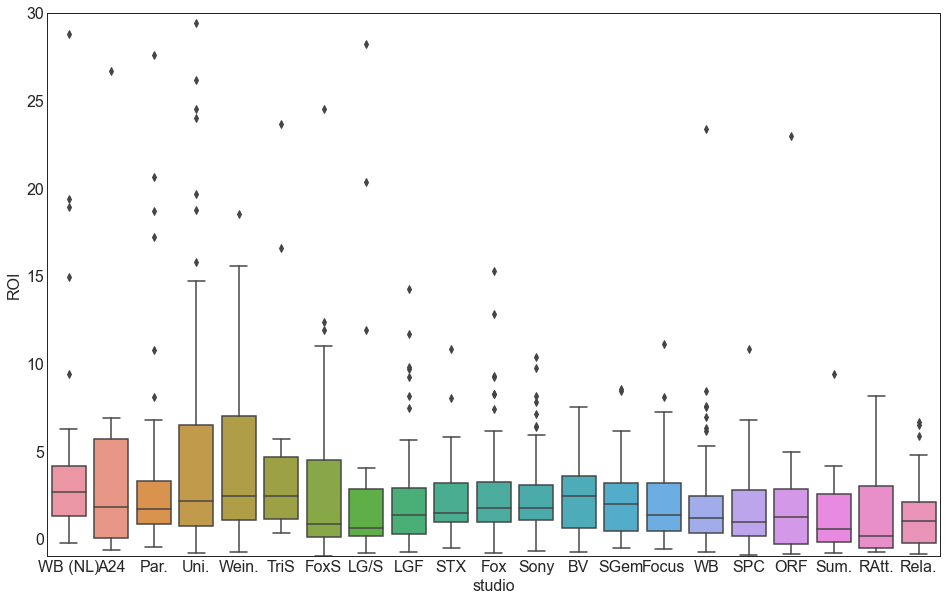

In [20]:
boxplot = sns.boxplot(x="studio", y="ROI", data=data_to_plot, order=studios_by_avg_roi_desc)
boxplot.set_ylim(-1,30)

In [21]:
studio_first_decile_roi = cleaned_data[['studio', 'ROI']].groupby('studio').quantile(.1)

studio_num_movies = cleaned_data['studio'].value_counts()
studio_num_movies

#studio_first_decile_roi[studio_first_decile_roi['ROI'] > 0]
#studio_num_movies[studio_num_movies[]]

Uni.     124
Fox      111
WB       102
Sony      80
BV        77
        ... 
RLJ        1
Saban      1
VE         1
CE         1
ATO        1
Name: studio, Length: 78, dtype: int64

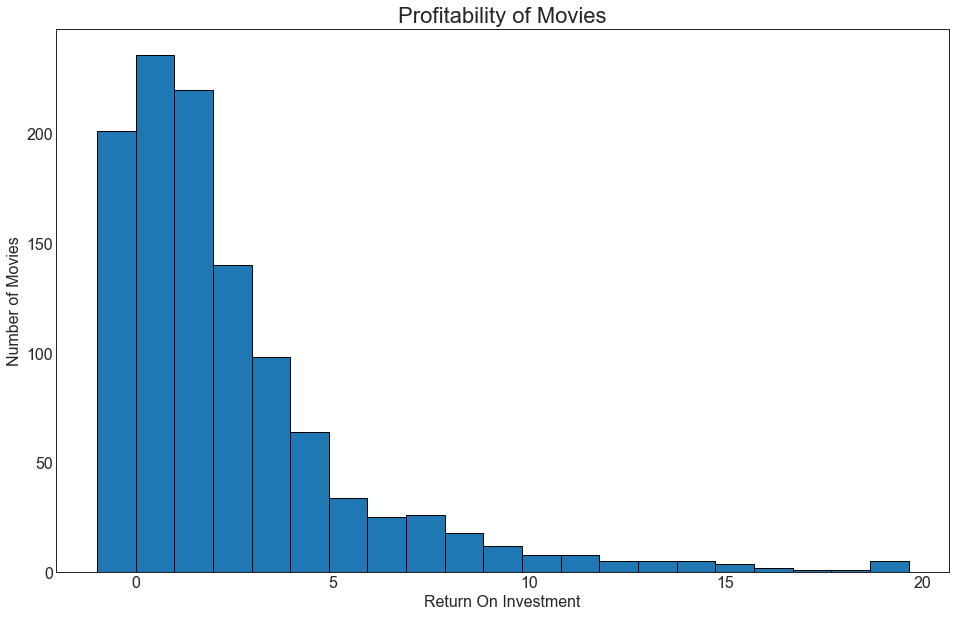

In [22]:
plt.hist(cleaned_data[cleaned_data['ROI'] < 20]['ROI'], bins=21, edgecolor='black')

plt.xlabel('Return On Investment')
plt.ylabel('Number of Movies')
plt.title('Profitability of Movies')
plt.show()

In [23]:
# # here you run your code to clean the data
# import code.data_cleaning as dc
# full_dataset = dc.full_clean()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [24]:
# here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***